In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")
import sklearn.preprocessing as skp
import sklearn.decomposition as skd
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.rcParams.update({'font.size': 19})
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = 7,4

from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [2]:
#Read the data into pandas dataframes

In [3]:
df_tips = pd.read_csv('tips.csv',index_col='UID',encoding = "ISO-8859-1")
df_tips.head()

,ID,Tipster,Date,Track,Horse,Bet Type,Odds,Result,TipsterActive
UID,,,,,,,,,
1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True


In [4]:
df_races = pd.read_csv('race-result-horse.csv')
df_races.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,2.0,1.22.65,8,NaN,NaN,2014-001
2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001
3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001
4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001


In [5]:
df_tips.dtypes

ID                 int64
Tipster           object
Date              object
Track             object
Horse             object
Bet Type          object
Odds             float64
Result            object
TipsterActive       bool
dtype: object

In [6]:
df_tips.isnull().any()

ID               False
Tipster          False
Date             False
Track            False
Horse            False
Bet Type         False
Odds             False
Result           False
TipsterActive    False
dtype: bool

In [7]:
df_races.dtypes

finishing_position        object
horse_number             float64
horse_name                object
horse_id                  object
jockey                    object
trainer                   object
actual_weight             object
declared_horse_weight     object
draw                      object
length_behind_winner      object
running_position_1       float64
running_position_2       float64
running_position_3       float64
running_position_4       float64
finish_time               object
win_odds                  object
running_position_5       float64
running_position_6       float64
race_id                   object
dtype: object

In [8]:
df_races.isnull().any()

finishing_position        True
horse_number              True
horse_name               False
horse_id                 False
jockey                   False
trainer                  False
actual_weight            False
declared_horse_weight    False
draw                     False
length_behind_winner     False
running_position_1        True
running_position_2        True
running_position_3        True
running_position_4        True
finish_time              False
win_odds                 False
running_position_5        True
running_position_6        True
race_id                  False
dtype: bool

In [9]:
#Drop and replace null values

In [10]:
df_races = df_races.dropna(subset = ['finishing_position'])


In [11]:
df_races['horse_number'] = df_races['horse_number'].fillna(0)

In [12]:
df_races.running_position_1 = df_races.running_position_1.fillna(0)
df_races.running_position_2 = df_races.running_position_2.fillna(0)
df_races.running_position_3 = df_races.running_position_3.fillna(0)
df_races.running_position_4 = df_races.running_position_4.fillna(0)
df_races.running_position_5 = df_races.running_position_5.fillna(0)
df_races.running_position_6 = df_races.running_position_6.fillna(0)

In [13]:
df_races.isnull().any()

finishing_position       False
horse_number             False
horse_name               False
horse_id                 False
jockey                   False
trainer                  False
actual_weight            False
declared_horse_weight    False
draw                     False
length_behind_winner     False
running_position_1       False
running_position_2       False
running_position_3       False
running_position_4       False
finish_time              False
win_odds                 False
running_position_5       False
running_position_6       False
race_id                  False
dtype: bool

In [14]:
df_tips = df_tips.rename(columns = {'Horse': 'horse_name', 'Odds' : 'win_odds'})

In [15]:
df_tips.columns

Index(['ID', 'Tipster', 'Date', 'Track', 'horse_name', 'Bet Type', 'win_odds',
       'Result', 'TipsterActive'],
      dtype='object')

In [16]:
#Create a results column in df_races
results = []
for pos in df_races['finishing_position']:
    if pos == 1:
        results.append('Win')
    else: results.append('Lose')
df_races['Result'] = results

In [17]:
#Concatenate the two dataframes
df = pd.concat([df_tips, df_races], join = 'inner')
df.head()

,horse_name,win_odds,Result
1,Fredricka,8,Lose
2,Spend A Penny,4.5,Lose
3,Straightothepoint,7,Lose
4,Miss Inga Sock,5,Lose
5,Peril,4.33,Win


In [18]:
df.dtypes

horse_name    object
win_odds      object
Result        object
dtype: object

In [19]:
#Change win_odds to a float datatype
df = df[pd.to_numeric(df['win_odds'], downcast = 'float', errors='coerce').notnull()]
df['win_odds'] = df['win_odds'].astype(float)
df.dtypes

horse_name     object
win_odds      float64
Result         object
dtype: object

# Are odds correlated with wins and losses? Are they accurate?

In [20]:
exec(open('useful.py').read())

In [21]:
#Separate dataframe into 2 separate dataframes of winners and losers
df_winners = df[df.Result == 'Win']
df_losers = df[df.Result == 'Lose']

In [22]:
#Determine Normality from plots

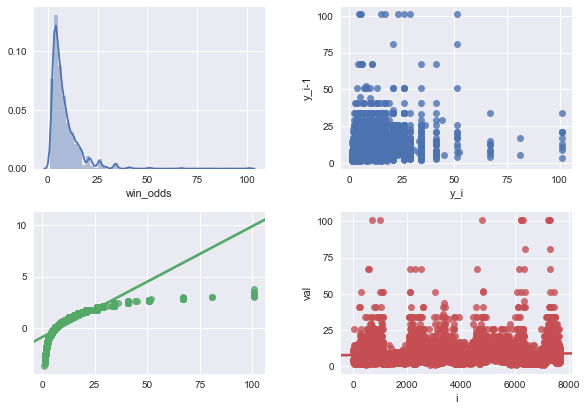

In [23]:
fourPlot(df_winners.win_odds)

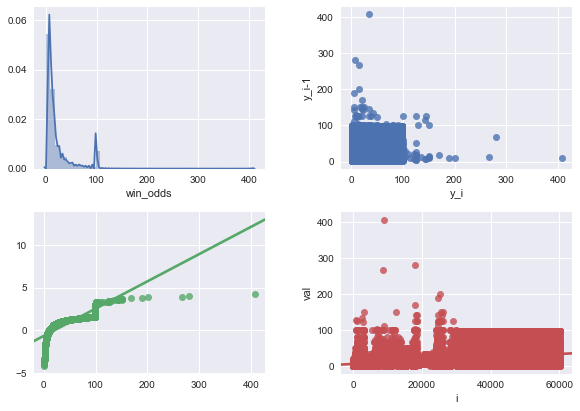

In [24]:
fourPlot(df_losers.win_odds)

In [25]:
#Since the data is non-normally distributed, we will use a Kruskall-Wallis test to compare the 2 
#non-parametric sample sizes

In [26]:
stats.kruskal(df_winners.win_odds,df_losers.win_odds)

KruskalResult(statistic=3049.796774907013, pvalue=0.0)

In [27]:
#Since p <.05, we can reject the null hypothesis that the median distribution of winners and losers are equal to
#each other

In [28]:
df_winners.win_odds.mean()

8.384568527918784

In [29]:
df_losers.win_odds.mean()

20.803691471502436

In [30]:
df_losers.win_odds.mean() - df_winners.win_odds.mean()

12.419122943583652

In [31]:
df_winners.win_odds.median()

6.0

In [32]:
df_losers.win_odds.median()

11.0

In [33]:
df_losers.win_odds.median() - df_winners.win_odds.median()

5.0

In [34]:
#With a median difference of 5 and a mean difference of 12.4, winning odds are statistically smaller for winners
#than for losers

In [35]:
#Find and plot the relationship between win odds and finishing position

In [36]:
df_races.dtypes

finishing_position        object
horse_number             float64
horse_name                object
horse_id                  object
jockey                    object
trainer                   object
actual_weight             object
declared_horse_weight     object
draw                      object
length_behind_winner      object
running_position_1       float64
running_position_2       float64
running_position_3       float64
running_position_4       float64
finish_time               object
win_odds                  object
running_position_5       float64
running_position_6       float64
race_id                   object
Result                    object
dtype: object

In [37]:
df_races = df_races.dropna(subset = ['finishing_position'])
df_races = df_races.replace(['---', 'DISQ', 'DNF', 'FE', 'PU', 'TNP', 'UR', 'VOID', 'WR', 'WV', 'WV-A', 'WX', 'WX-A'], 0)
df_races = df_races[~df_races['finishing_position'].str.contains('DH', na = True)]
df_races['finishing_position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14'], dtype=object)

In [38]:
df_races['win_odds'] = df_races['win_odds'].astype(float)
df_races['finishing_position'] = df_races['finishing_position'].astype(float)
df_races.dtypes

finishing_position       float64
horse_number             float64
horse_name                object
horse_id                  object
jockey                    object
trainer                   object
actual_weight             object
declared_horse_weight     object
draw                      object
length_behind_winner      object
running_position_1       float64
running_position_2       float64
running_position_3       float64
running_position_4       float64
finish_time               object
win_odds                 float64
running_position_5       float64
running_position_6       float64
race_id                   object
Result                    object
dtype: object

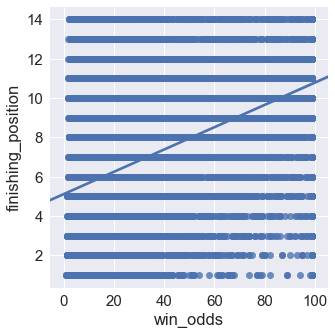

In [39]:
ax = sns.lmplot(data=df_races,x='win_odds',y='finishing_position')

In [40]:
slope, intercept, r, p, serr = stats.linregress(df_races.win_odds, df_races.finishing_position,)
print("slope=",slope)
print("intercept=",intercept)
print("r value=",r)
print("p value=",p)
print("standard error",serr)

slope= 0.05675591377666186
intercept= 5.1121797920116485
r value= 0.4818527882442487
p value= 0.0
standard error 0.0006023279832196768


In [41]:
expected = (slope * df_races.win_odds + intercept)
residuals = df_races.finishing_position - expected

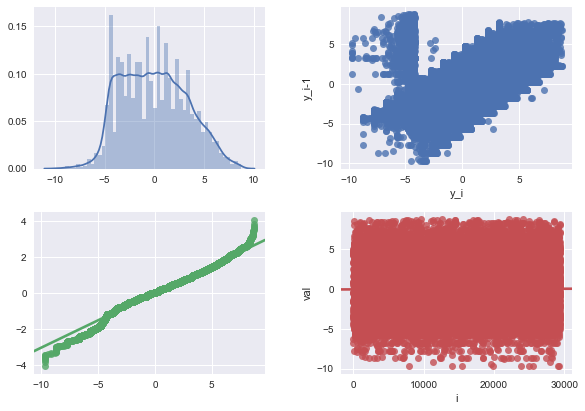

In [42]:
fourPlot(residuals)

In [43]:
#The residuals appear to be normally distributed

### Using the Model

What will be the finishing position of a horse with 7.0 odds?

In [44]:
slope * 7 + intercept

5.509471188448281

# Which tipster is doing the best?

In [45]:
df_tips.head()

,ID,Tipster,Date,Track,horse_name,Bet Type,win_odds,Result,TipsterActive
UID,,,,,,,,,
1,1,Tipster A,24/07/2015,Ascot,Fredricka,Win,8.00,Lose,True
2,2,Tipster A,24/07/2015,Thirsk,Spend A Penny,Win,4.50,Lose,True
3,3,Tipster A,24/07/2015,York,Straightothepoint,Win,7.00,Lose,True
4,4,Tipster A,24/07/2015,Newmarket,Miss Inga Sock,Win,5.00,Lose,True
5,5,Tipster A,25/07/2015,Ascot,Peril,Win,4.33,Win,True


In [46]:
#Create pivot table
tipsters = pd.pivot_table(df_tips, index = 'Tipster', columns = ['Result'], values = 'Date', aggfunc = 'count')
tipsters['Total Tips'] = tipsters['Win'] + tipsters['Lose']
tipsters['Success Rate'] = tipsters['Win'] / tipsters['Total Tips']
tipsters = tipsters.sort_values(by = 'Success Rate', ascending = False)
tipsters.head()

Result,Lose,Win,Total Tips,Success Rate
Tipster,,,,
Tipster A,839,492,1331,0.369647
Tipster R,1278,623,1901,0.327722
Tipster N,289,126,415,0.303614
Tipster Z,623,260,883,0.294451
Tipster F,105,41,146,0.280822


In [47]:
tipsters.iloc[0]

Result
Lose             839.000000
Win              492.000000
Total Tips      1331.000000
Success Rate       0.369647
Name: Tipster A, dtype: float64

In [48]:
#Tipster A has the best track record with a 37% success rate

# Which horse is doing the best

In [49]:
df_races.head()

,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id,Result
0,1.0,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.0,1.22.33,3.8,0.0,0.0,2014-001,Lose
1,2.0,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,2.0,1.22.65,8.0,0.0,0.0,2014-001,Lose
2,3.0,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,3.0,1.22.66,5.7,0.0,0.0,2014-001,Lose
3,4.0,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,4.0,1.22.66,6.1,0.0,0.0,2014-001,Lose
4,5.0,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,0.0,0.0,2014-001,Lose


In [50]:
horse_pivot = pd.pivot_table(df_races, values = ['finishing_position', 'win_odds'], index = 'horse_name', aggfunc = 'mean')
horse_pivot = horse_pivot.sort_values(by = 'finishing_position')
horse_pivot.head(20)

,finishing_position,win_odds
horse_name,,
HOT KING PRAWN,1.000000,1.200000
BAYONET,1.000000,5.750000
NOTHINGILIKEMORE,1.000000,1.975000
COBY BOY,1.000000,98.000000
BRAVO WATCHMAN,1.000000,2.400000
CHAUTAUQUA,1.000000,2.800000
SIGHT LEADER,1.000000,1.700000
TRAVEL EMPEROR,1.000000,1.400000
CALCULATION,1.000000,4.600000


# Which jockey is doing the best?

In [51]:
jockey_pivot = pd.pivot_table(df_races, values = ['finishing_position', 'win_odds'], index = 'jockey', aggfunc = 'mean')
jockey_pivot = jockey_pivot.sort_values(by = 'finishing_position')
jockey_pivot.head(20)

,finishing_position,win_odds
jockey,,
J Moreira,4.225359,5.072690
Y Iwata,4.250000,39.400000
Y Fukunaga,4.500000,12.366667
K Ikezoe,5.000000,37.000000
M Barzalona,5.111111,26.955556
Z Purton,5.228430,9.263935
M F Poon,5.338843,10.466116
P-C Boudot,5.500000,52.000000
Y Take,5.500000,31.900000


# Which trainer is doing the best?

In [52]:
trainer_pivot = pd.pivot_table(df_races, values = ['finishing_position', 'win_odds'], index = 'trainer', aggfunc = 'mean')
trainer_pivot = trainer_pivot.sort_values(by = 'finishing_position')
trainer_pivot.head(20)

,finishing_position,win_odds
trainer,,
M Hawkes,1.000000,2.800000
de Royer Dupre,3.000000,14.500000
Y Yahagi,3.000000,71.000000
A Fabre,3.500000,27.150000
N Hori,3.714286,7.485714
M Saito,4.000000,10.333333
M Delzangles,4.000000,22.000000
Ed Walker,5.000000,29.000000
R Okubo,5.000000,69.000000


# Do cluster analysis on other factors of df_races

In [53]:
df_races_norm = df_races.copy()
df_races_norm = df_races_norm.ix[:,np.r_[0:2, 6:9, 10:14, 15:18]]
len(df_races_norm.columns)

12

In [54]:
df_races_norm.ix[:, :12] = skp.scale(df_races_norm.astype(np.float))
df_races_norm.head()

,finishing_position,horse_number,actual_weight,declared_horse_weight,draw,running_position_1,running_position_2,running_position_3,running_position_4,win_odds,running_position_5,running_position_6
0,-1.564832,-1.568354,1.595424,-1.263071,-1.567277,-1.565163,-1.296884,-1.296523,-0.650286,-0.836850,-0.329104,-0.120223
1,-1.296432,-1.301895,1.595424,-0.557661,1.639500,0.312506,0.581653,0.582299,-0.426673,-0.704072,-0.329104,-0.120223
2,-1.028033,0.829775,-0.302275,-0.721710,-1.032814,-1.296924,-1.565247,-1.564926,-0.203060,-0.776784,-0.329104,-0.120223
3,-0.759633,-1.035436,1.437282,1.853856,-1.300046,-0.223970,-0.760159,-0.491314,0.020553,-0.764138,-0.329104,-0.120223
4,-0.491234,0.030399,0.330291,0.443036,0.570574,0.580745,0.850016,0.850702,0.244167,-0.764138,-0.329104,-0.120223


In [55]:
df_races_norm.corr()

,finishing_position,horse_number,actual_weight,declared_horse_weight,draw,running_position_1,running_position_2,running_position_3,running_position_4,win_odds,running_position_5,running_position_6
finishing_position,1.000000,0.124024,-0.108458,-0.046671,0.130978,0.221615,0.275519,0.571582,0.435506,0.481853,0.159878,0.045077
horse_number,0.124024,1.000000,-0.810116,-0.041350,0.030102,0.082647,0.085893,0.100763,0.084680,0.216966,0.013394,-0.007709
actual_weight,-0.108458,-0.810116,1.000000,0.029595,-0.001346,-0.012213,-0.019555,-0.057140,-0.034842,-0.220188,-0.011124,-0.010335
declared_horse_weight,-0.046671,-0.041350,0.029595,1.000000,-0.000739,-0.120099,-0.124434,-0.109249,-0.089584,-0.087586,-0.085148,-0.043192
draw,0.130978,0.030102,-0.001346,-0.000739,1.000000,0.229295,0.208650,0.169095,0.098034,0.150986,0.017915,-0.010304
running_position_1,0.221615,0.082647,-0.012213,-0.120099,0.229295,1.000000,0.931504,0.637126,0.172576,0.274955,0.020918,-0.016508
running_position_2,0.275519,0.085893,-0.019555,-0.124434,0.208650,0.931504,1.000000,0.723813,0.186125,0.297612,0.020884,-0.017554
running_position_3,0.571582,0.100763,-0.057140,-0.109249,0.169095,0.637126,0.723813,1.000000,0.244486,0.360574,0.025312,-0.017555
running_position_4,0.435506,0.084680,-0.034842,-0.089584,0.098034,0.172576,0.186125,0.244486,1.000000,0.181453,0.261436,0.067399
win_odds,0.481853,0.216966,-0.220188,-0.087586,0.150986,0.274955,0.297612,0.360574,0.181453,1.000000,0.011939,-0.006268


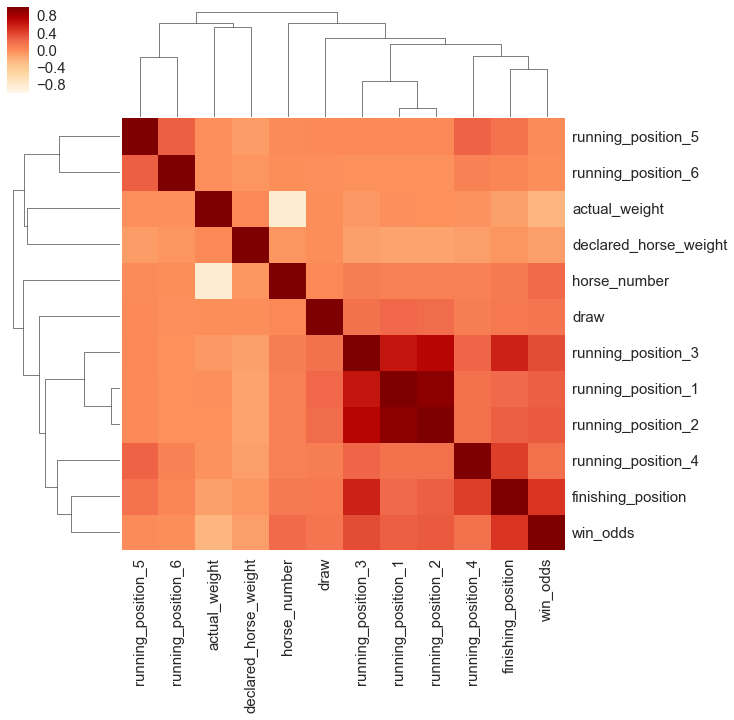

In [56]:
cg = sns.clustermap(df_races_norm.corr(),cmap=plt.cm.OrRd)
plot = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)

In [57]:
df_races_norm['horse_name'] = df_races['horse_name']
df_races_norm.head()

,finishing_position,horse_number,actual_weight,declared_horse_weight,draw,running_position_1,running_position_2,running_position_3,running_position_4,win_odds,running_position_5,running_position_6,horse_name
0,-1.564832,-1.568354,1.595424,-1.263071,-1.567277,-1.565163,-1.296884,-1.296523,-0.650286,-0.836850,-0.329104,-0.120223,DOUBLE DRAGON
1,-1.296432,-1.301895,1.595424,-0.557661,1.639500,0.312506,0.581653,0.582299,-0.426673,-0.704072,-0.329104,-0.120223,PLAIN BLUE BANNER
2,-1.028033,0.829775,-0.302275,-0.721710,-1.032814,-1.296924,-1.565247,-1.564926,-0.203060,-0.776784,-0.329104,-0.120223,GOLDWEAVER
3,-0.759633,-1.035436,1.437282,1.853856,-1.300046,-0.223970,-0.760159,-0.491314,0.020553,-0.764138,-0.329104,-0.120223,SUPREME PROFIT
4,-0.491234,0.030399,0.330291,0.443036,0.570574,0.580745,0.850016,0.850702,0.244167,-0.764138,-0.329104,-0.120223,THE ONLY KID


In [58]:
df_byhorse = df_races_norm.groupby('horse_name').mean()
df_byhorse.head()

,finishing_position,horse_number,actual_weight,declared_horse_weight,draw,running_position_1,running_position_2,running_position_3,running_position_4,win_odds,running_position_5,running_position_6
horse_name,,,,,,,,,,,,
A BEAUTIFUL,0.103913,-0.027527,-0.171637,-0.723850,-0.138170,-0.235633,-0.176763,-0.059535,-0.368339,0.391694,-0.329104,-0.120223
A FAST ONE,-0.210053,0.474497,-0.400172,-0.374864,-0.078416,0.363599,0.313291,-0.210130,-0.873899,0.215743,-0.329104,-0.120223
A SHIN HIKARI,-0.357034,-0.236060,0.488433,0.221570,-0.231120,-1.565163,-1.565247,-1.564926,-0.650286,-0.220379,1.771392,-0.120223
A SHIN HOOF,-0.491234,-1.568354,0.962857,-2.148935,0.169727,-0.223970,-0.089253,-0.491314,-0.873899,0.576292,-0.329104,-0.120223
A STAR LUSTER,1.119163,-0.369289,0.172149,0.385619,-0.231120,1.385460,0.984197,1.119105,-0.873899,2.172795,-0.329104,-0.120223


In [59]:
pca_model = skd.PCA().fit(df_races_norm.drop(['horse_name'], axis = 1))
pca_model.components_.shape

(12, 12)

In [60]:
pca_model.explained_variance_

array([3.29014101, 1.82665808, 1.47516214, 1.1043566 , 0.97221783,
       0.90313589, 0.81149529, 0.63206883, 0.51839817, 0.22201896,
       0.18501482, 0.05933238])

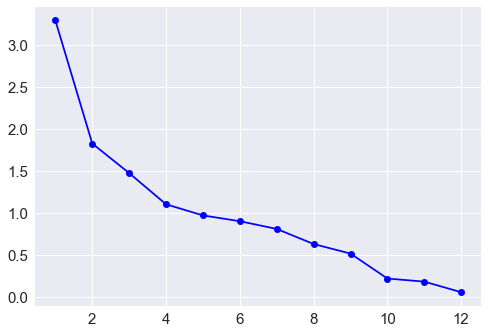

In [61]:
plt.plot(range(1,13),pca_model.explained_variance_,'b-o')

In [62]:
#Keep 4 components

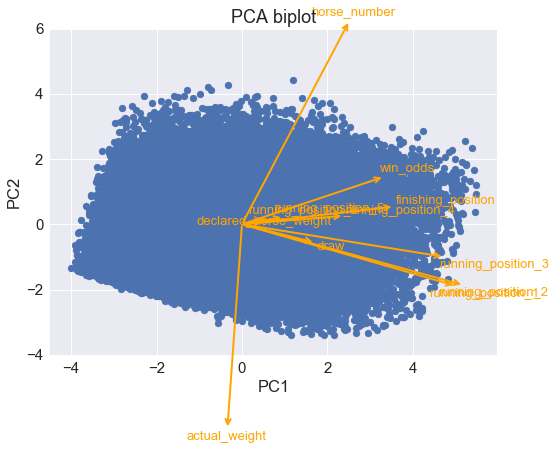

In [63]:
# Scatterplot of disaggregated data
X = pca_model.transform(df_races_norm.ix[:,:12])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA biplot')
plt.ylim(-4, 6)

# Add variable unit vector projections
V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(df_races_norm.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=13, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, color='orange'))

In [64]:
# Create a three-factor model
fa_model = skd.FactorAnalysis(n_components=2).fit(df_races_norm.drop(['horse_name'], axis = 1))

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:3,:].T, 
                   index=df_races_norm.describe().columns,
                   columns=['Factor1', 'Factor2'])
df_loadings

,Factor1,Factor2
finishing_position,0.278458,0.132332
horse_number,0.088523,0.883090
actual_weight,-0.021892,-0.913475
declared_horse_weight,-0.125086,-0.033791
draw,0.210407,0.007801
running_position_1,0.933116,-0.006439
running_position_2,0.997979,-0.002706
running_position_3,0.725005,0.054859
running_position_4,0.187986,0.064028
win_odds,0.300170,0.235264


In [65]:
# Create a three-factor model
fa_model = skd.FactorAnalysis(n_components=3).fit(df_races_norm.drop(['horse_name'], axis = 1))

# Show the loadings
df_loadings = pd.DataFrame(fa_model.components_[:3,:].T, 
                   index=df_races_norm.describe().columns,
                   columns=['Factor1', 'Factor2', 'Factor 3'])
df_loadings

,Factor1,Factor2,Factor 3
finishing_position,0.337844,0.936192,-0.017916
horse_number,0.093774,0.114732,0.835648
actual_weight,-0.027726,-0.123993,-0.949261
declared_horse_weight,-0.125333,-0.006004,-0.028884
draw,0.213903,0.062757,-0.008949
running_position_1,0.927868,-0.098205,0.000610
running_position_2,0.996928,-0.065462,0.000006
running_position_3,0.748041,0.340081,-0.007054
running_position_4,0.212202,0.387929,-0.012635
win_odds,0.324942,0.400168,0.169936


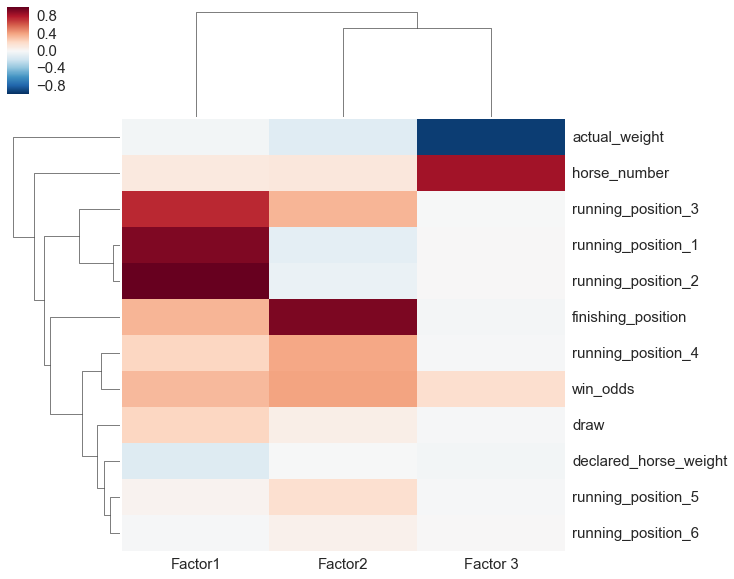

In [66]:
cg = sns.clustermap(df_loadings)
plot = plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)


In [67]:
#Horses who were frequently in low positions tended to have lower winning odds and by far the lowest
#finishing position.

# Build a multivariate linear model to predict finishing position and determine important factors

In [68]:
#convert dtypes
df_races['actual_weight'] = df_races['actual_weight'].astype(float)
df_races['declared_horse_weight'] = df_races['declared_horse_weight'].astype(float)
df_races['total_weight'] = df_races['declared_horse_weight'] + df_races['actual_weight']

In [69]:
#build OLS model
model1 = smf.ols('finishing_position ~ win_odds + total_weight + horse_number + running_position_1 + running_position_2 + running_position_3 + running_position_4 + running_position_5 + running_position_6', data=df_races).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     finishing_position   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     3934.
Date:                Tue, 17 Apr 2018   Prob (F-statistic):               0.00
Time:                        22:03:35   Log-Likelihood:                -68670.
No. Observations:               29364   AIC:                         1.374e+05
Df Residuals:                   29354   BIC:                         1.374e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.3145      0.309     -1.017      0.309      -0.921       0.292
win_odds               0.0359      0.001     70.354      0.000       0.035       0.037
total_weight           0.0024      0.000      9.960      0.000       0.002       0.003
horse_number           0.0036      0.004      0.906      0.365      -0.004       0.012
running_position_1    -0.0837      0.011     -7.658      0.000      -0.105      -0.062
running_position_2    -0.2329      0.012    -19.086      0.000      -0.257      -0.209
running_position_3     0.6206      0.006    104.027      0.000       0.609       0.632
running_position_4     0.2240      0.004     63.529      0.000       0.217       0.231
running_position_5     0.1083      0.006     17.944      0.000       0.096       0.120
running_position_6     0.0569      0.016      3.635      0.000       0.026       0.088
==============================================================================
Omnibus:                      149.075   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.821
Skew:                          -0.170   Prob(JB):                     1.08e-33
Kurtosis:                       3.096   Cond. No.                     2.61e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
#Examine how factors are correlated
df_races.corr()['finishing_position']

finishing_position       1.000000
horse_number             0.124024
actual_weight           -0.108458
declared_horse_weight   -0.046671
running_position_1       0.221615
running_position_2       0.275519
running_position_3       0.571582
running_position_4       0.435506
win_odds                 0.481853
running_position_5       0.159878
running_position_6       0.045077
total_weight            -0.057438
Name: finishing_position, dtype: float64